# Random Forest Regression

Objective: Prediction using Random Forest Regression  
Dataset: petrol_consumption.csv

In [1]:
import pandas as pd
import numpy as np 
import seaborn as sns

import matplotlib.pyplot as plt
%matplotlib inline

data = pd.read_csv('petrol_consumption.csv')
print(data.shape)
data.head()

(48, 5)


,Petrol_tax,Average_income,Paved_Highways,Population_Driver_licence(%),Petrol_Consumption
0,9.0,3571,1976,0.525,541
1,9.0,4092,1250,0.572,524
2,9.0,3865,1586,0.580,561
3,7.5,4870,2351,0.529,414
4,8.0,4399,431,0.544,410


In [2]:
data.columns = ['Petrol','AVG_Income','Highway','%Driver','Consumption']
data.head()

,Petrol,AVG_Income,Highway,%Driver,Consumption
0,9.0,3571,1976,0.525,541
1,9.0,4092,1250,0.572,524
2,9.0,3865,1586,0.580,561
3,7.5,4870,2351,0.529,414
4,8.0,4399,431,0.544,410


## Data Exploration

7.00     19
8.00     10
9.00      8
7.50      4
8.50      3
6.58      1
6.00      1
5.00      1
10.00     1
Name: Petrol, dtype: int64


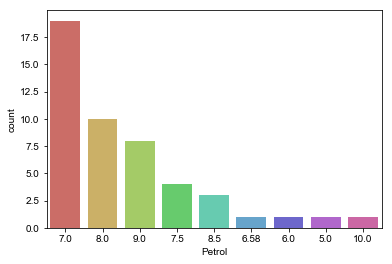

In [3]:
print(data['Petrol'].value_counts())

sns.countplot(x='Petrol',data = data, palette='hls',order = data['Petrol'].value_counts().index)
sns.set(rc={'figure.figsize':(8,8)})
plt.show()

## Correlation

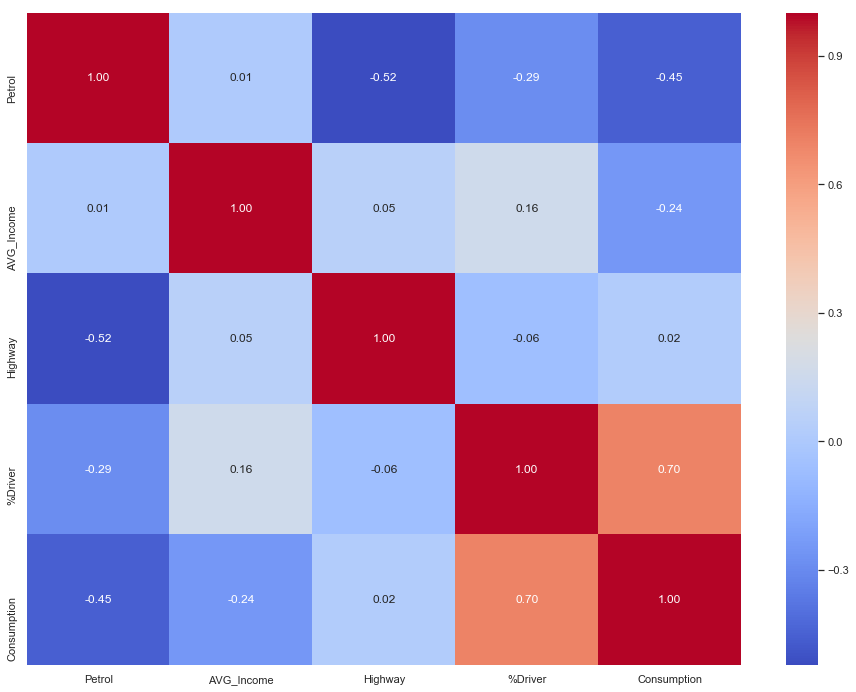

In [4]:
plt.figure(figsize=(16,12))
sns.heatmap(data=data.corr(),annot=True,fmt='.2f',cmap='coolwarm')
plt.show()

In [5]:
corr_rank = data.corr()
corr_rank["Consumption"].sort_values(ascending=False)

Consumption    1.000000
%Driver        0.698965
Highway        0.019042
AVG_Income    -0.244862
Petrol        -0.451280
Name: Consumption, dtype: float64

## Check Null

In [6]:
data.isnull().sum()

Petrol         0
AVG_Income     0
Highway        0
%Driver        0
Consumption    0
dtype: int64

## Data Processing and Selection

In [7]:
X = data.iloc[:, 0:4].values
print('Feature Dataset', X.shape)
X[0:2]

Feature Dataset (48, 4)


array([[9.000e+00, 3.571e+03, 1.976e+03, 5.250e-01],
       [9.000e+00, 4.092e+03, 1.250e+03, 5.720e-01]])

In [8]:
y = data.iloc[:, -1].values
print('Target Dataset', y.shape)
y[0:5]

Target Dataset (48,)


array([541, 524, 561, 414, 410], dtype=int64)

## Data Normalization

In [9]:
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
scaler.fit(X)
X = scaler.transform(X)
print('Feature Dataset', X.shape)
X[0:2]

Feature Dataset (48, 4)


array([[ 1.4154413 , -1.18184136, -1.03892124, -0.8259031 ],
       [ 1.4154413 , -0.26396904, -1.24905478,  0.03036408]])

## Split Train Test

In [10]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=1)

print("X TRAIN Set: ", X_train.shape, y_train.shape)
print("X TEST Set : ", X_test.shape, y_test.shape)

X TRAIN Set:  (38, 4) (38,)
X TEST Set :  (10, 4) (10,)


## Random Forest Regression

In [11]:
from sklearn.ensemble import RandomForestRegressor
regressor = RandomForestRegressor(n_estimators=200, random_state=0)  
regressor.fit(X_train, y_train)  
y_pred = regressor.predict(X_test) 

from sklearn import metrics
print("R-Square               :", round(metrics.r2_score(y_test, y_pred),4))
print('Mean Absolute Error    :', round(metrics.mean_absolute_error(y_test, y_pred),4))  
print('Mean Squared Error     :', round(metrics.mean_squared_error(y_test, y_pred),4))  
print('Root Mean Squared Error:', round(np.sqrt(metrics.mean_squared_error(y_test, y_pred)),4)) 
print("Accuracy score         :", round(regressor.score(X_test, y_test),4))

R-Square               : 0.8925
Mean Absolute Error    : 19.135
Mean Squared Error     : 863.2345
Root Mean Squared Error: 29.3809
Accuracy score         : 0.8925


In [12]:
from sklearn.ensemble import RandomForestClassifier
model= RandomForestClassifier()
model.fit(X_train, y_train)  
predicted = model.predict(X_test)

print("R-Square               :", round(metrics.r2_score(y_test, predicted),4))
print('Mean Absolute Error    :', round(metrics.mean_absolute_error(y_test, predicted),4))  
print('Mean Squared Error     :', round(metrics.mean_squared_error(y_test, predicted),4))  
print('Root Mean Squared Error:', round(np.sqrt(metrics.mean_squared_error(y_test, predicted)),4))
print("Accuracy score         :", round(model.score(X_test, y_test),4))

R-Square               : -1.0745
Mean Absolute Error    : 93.0
Mean Squared Error     : 16661.0
Root Mean Squared Error: 129.0775
Accuracy score         : 0.0


D:\Anaconda3\lib\site-packages\sklearn\ensemble\forest.py:246: FutureWarning: The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.
  "10 in version 0.20 to 100 in 0.22.", FutureWarning)


## Data Prediction

In [13]:
df_pred1 = data[data.index == 2]
df_pred2 = data[data.index == 3]

df_pred = df_pred1.append(df_pred2)
df_pred.head()

,Petrol,AVG_Income,Highway,%Driver,Consumption
2,9.0,3865,1586,0.580,561
3,7.5,4870,2351,0.529,414


In [14]:
Xp = df_pred.iloc[:, 0:4]
Xp = scaler.transform(Xp)

yp = df_pred["Consumption"]

D:\Anaconda3\lib\site-packages\ipykernel_launcher.py:2: DataConversionWarning: Data with input dtype int64, float64 were all converted to float64 by StandardScaler.
  


In [15]:
RFR_pred = regressor.predict(Xp)
RFR_pred

array([556.89 , 491.395])

In [16]:
RFC_pred = model.predict(Xp)
RFC_pred

array([524, 464], dtype=int64)